/home/jp/Repositorios/UDEA/Teoria_de_Control/.venv/lib/python3.12/site-packages/control/timeresp.py:1975: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "
/home/jp/Repositorios/UDEA/Teoria_de_Control/.venv/lib/python3.12/site-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/jp/Repositorios/UDEA/Teoria_de_Control/.venv/lib/python3.12/site-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/jp/Repositorios/UDEA/Teoria_de_Control/.venv/lib/python3.12/site-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/home/jp/Repositorios/UDEA/Teoria_de_Contr

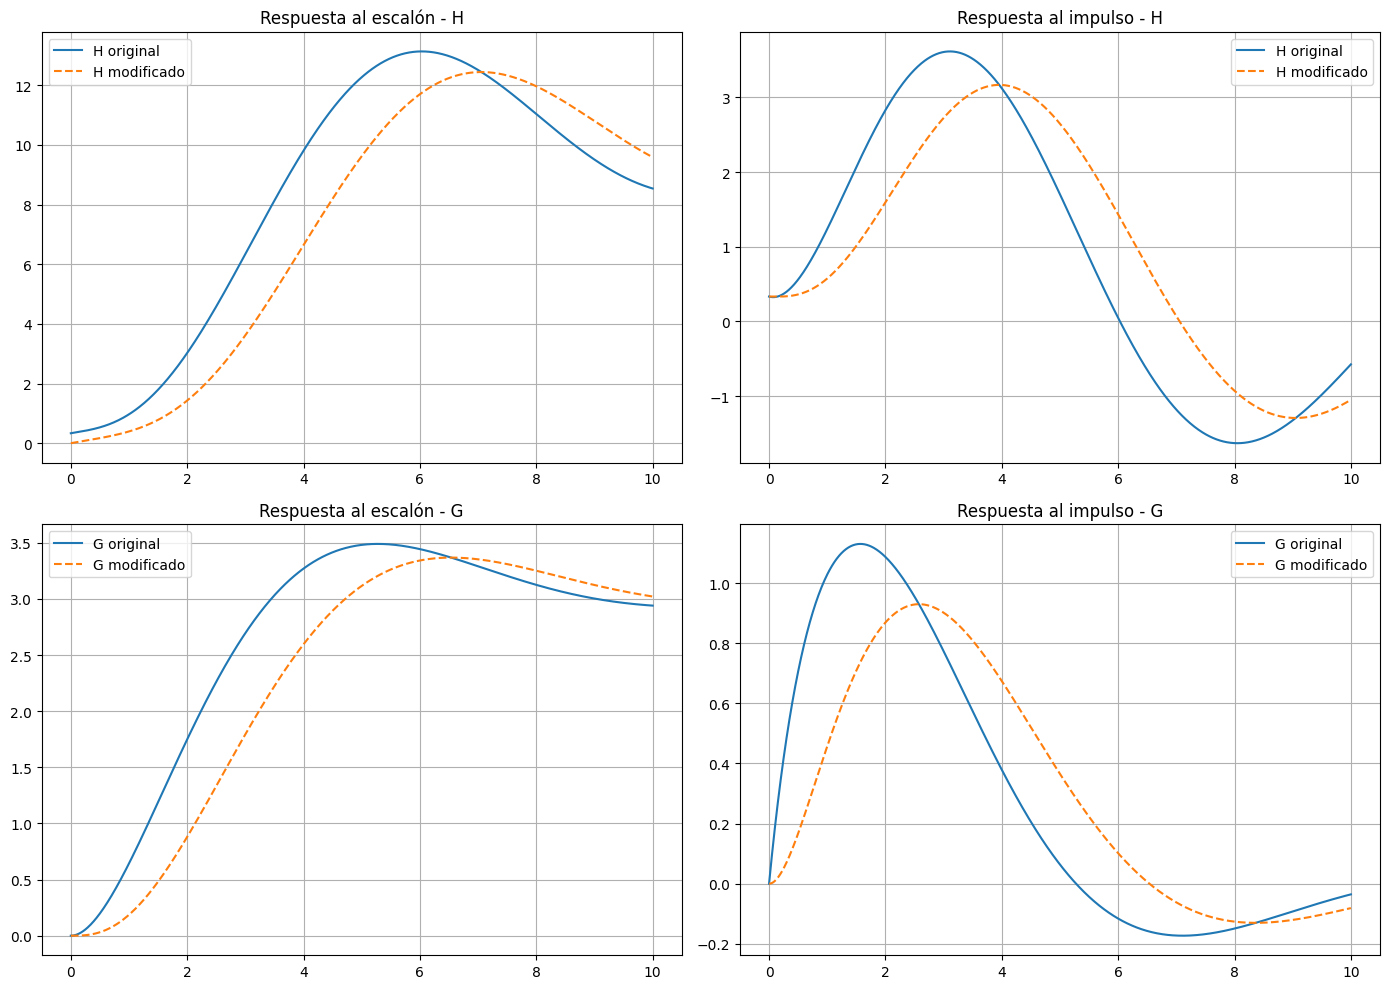

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


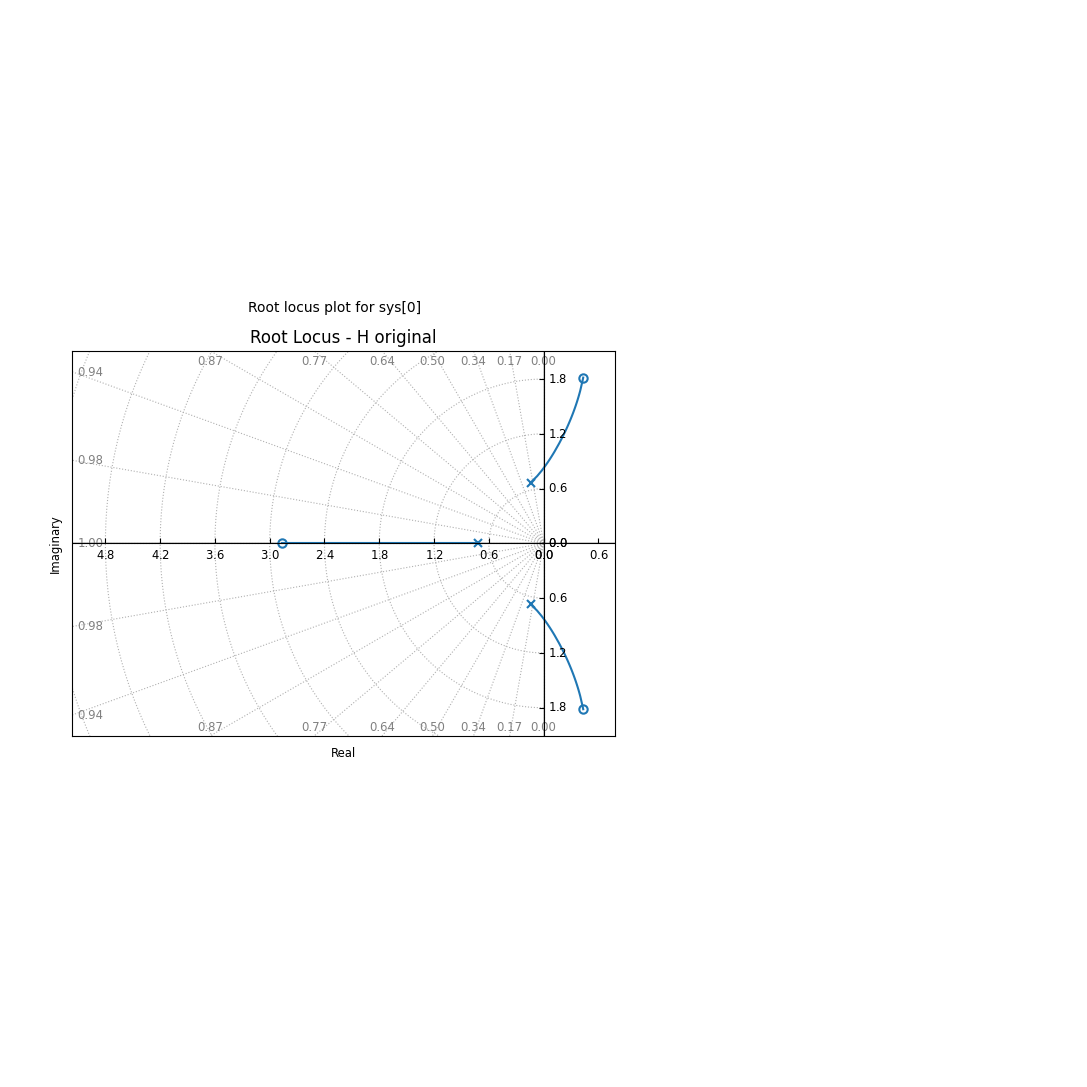

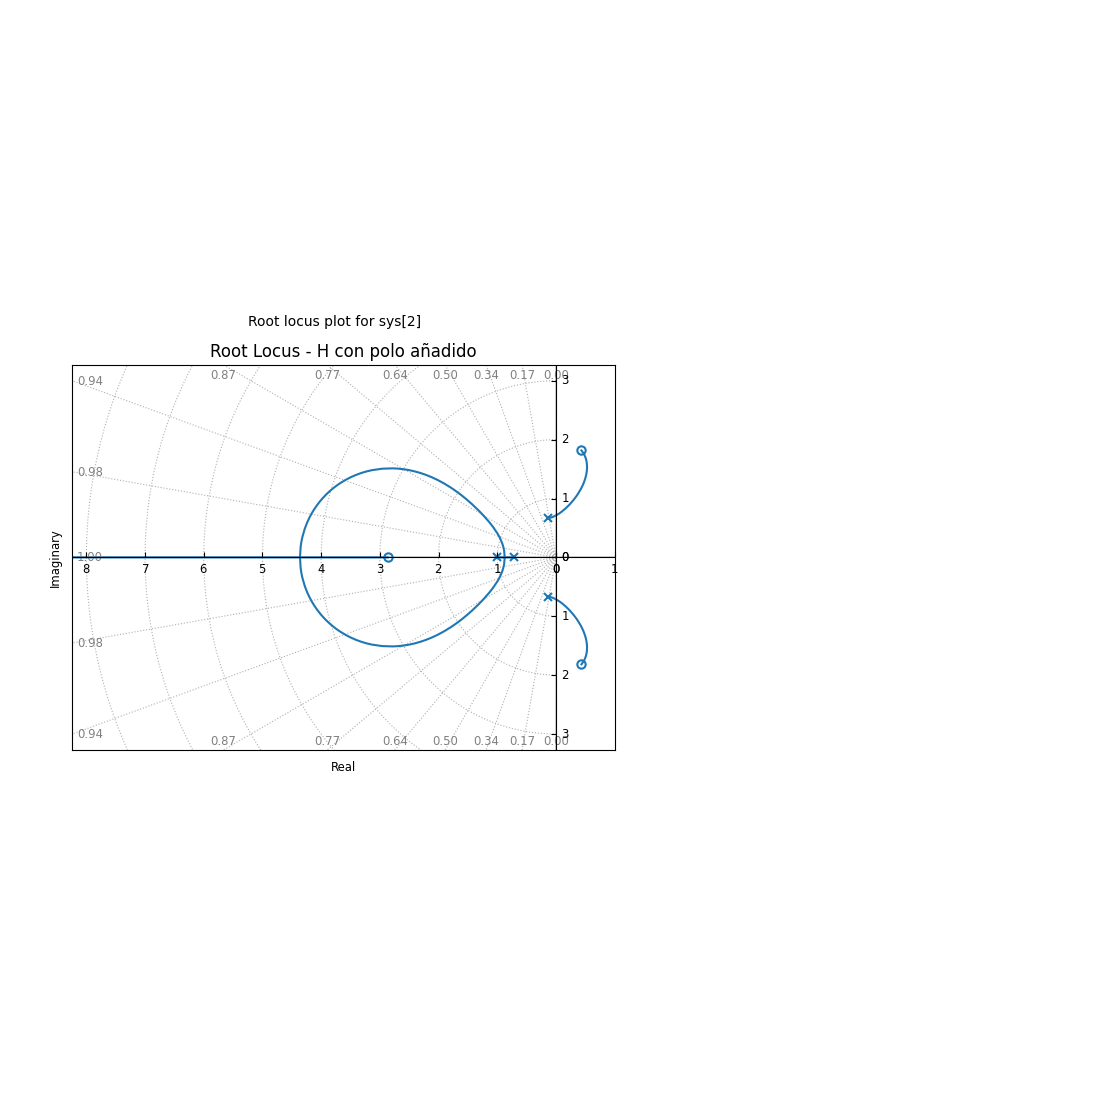

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


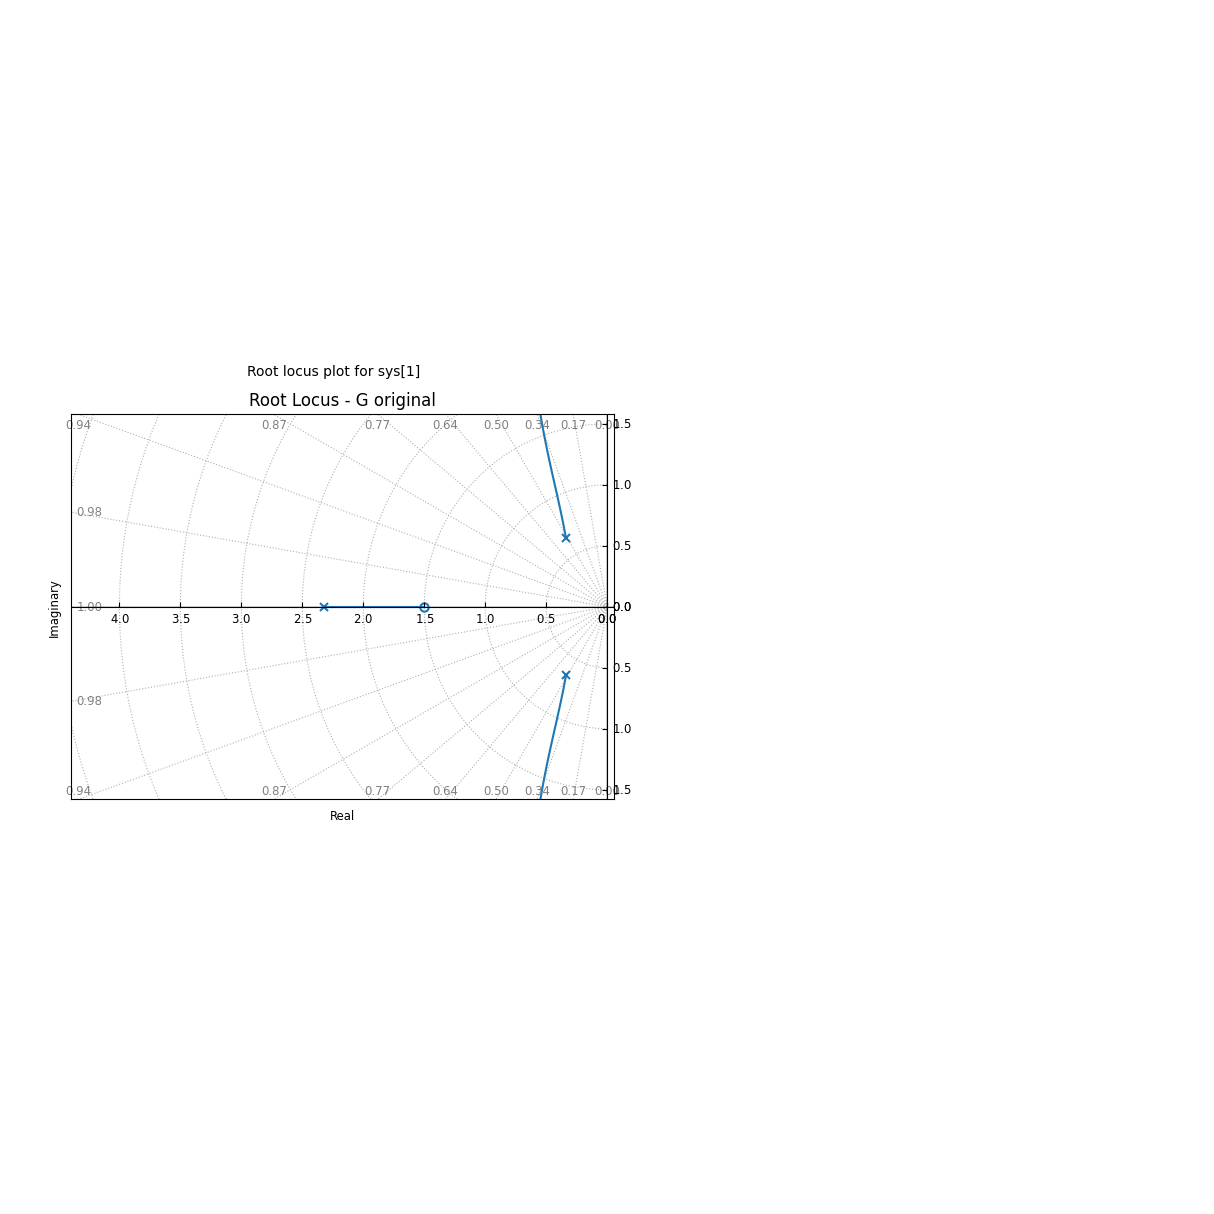

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


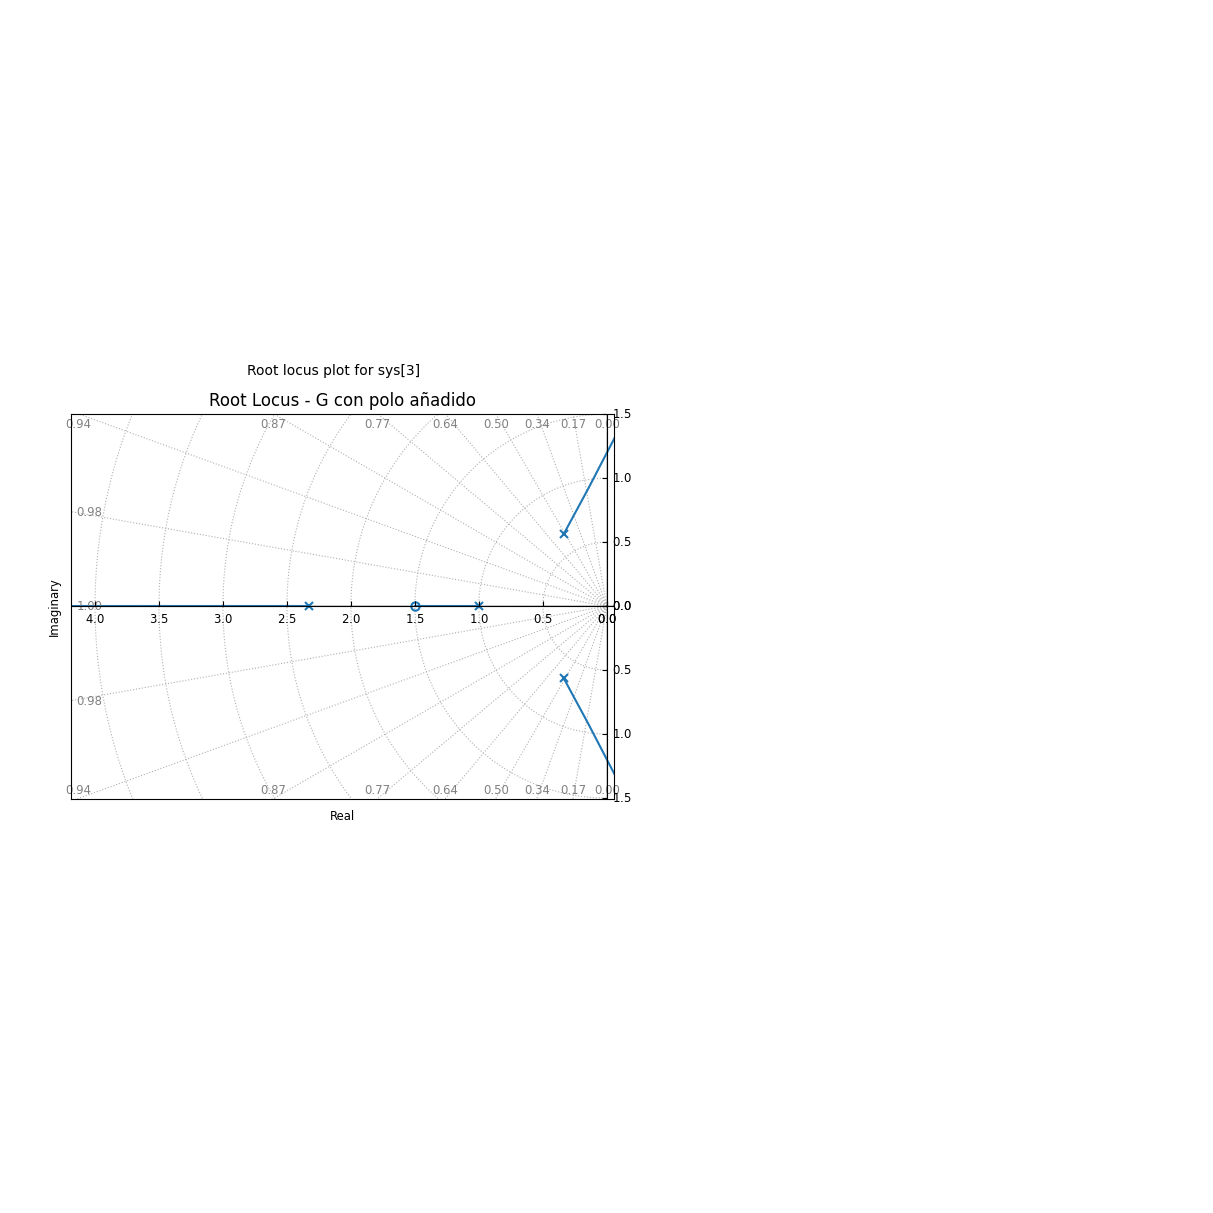

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir funciones originales
num_H = [1, 2, 1, 10]
den_H = [3, 3, 2, 1]
H = ctrl.tf(num_H, den_H)

num_G = [2, 3]
den_G = [1, 3, 2, 1]
G = ctrl.tf(num_G, den_G)

# Añadir un polo simple s+1
polo_extra = [1, 1]
H_mod = ctrl.tf(num_H, np.polymul(den_H, polo_extra))
G_mod = ctrl.tf(num_G, np.polymul(den_G, polo_extra))

# Tiempo común para todas las simulaciones
t = np.linspace(0, 10, 1000)

# Figura de respuestas temporales
fig_resp, axs = plt.subplots(2, 2, figsize=(14, 10))

# Respuesta al escalón - H
t_H, y_H = ctrl.step_response(H, T=t)
_, y_H_mod = ctrl.step_response(H_mod, T=t)
axs[0, 0].plot(t_H, y_H, label='H original')
axs[0, 0].plot(t_H, y_H_mod, label='H modificado', linestyle='--')
axs[0, 0].set_title("Respuesta al escalón - H")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Respuesta al impulso - H
_, y_H_imp = ctrl.impulse_response(H, T=t)
_, y_H_mod_imp = ctrl.impulse_response(H_mod, T=t)
axs[0, 1].plot(t, y_H_imp, label='H original')
axs[0, 1].plot(t, y_H_mod_imp, label='H modificado', linestyle='--')
axs[0, 1].set_title("Respuesta al impulso - H")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Respuesta al escalón - G
_, y_G = ctrl.step_response(G, T=t)
_, y_G_mod = ctrl.step_response(G_mod, T=t)
axs[1, 0].plot(t, y_G, label='G original')
axs[1, 0].plot(t, y_G_mod, label='G modificado', linestyle='--')
axs[1, 0].set_title("Respuesta al escalón - G")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Respuesta al impulso - G
_, y_G_imp = ctrl.impulse_response(G, T=t)
_, y_G_mod_imp = ctrl.impulse_response(G_mod, T=t)
axs[1, 1].plot(t, y_G_imp, label='G original')
axs[1, 1].plot(t, y_G_mod_imp, label='G modificado', linestyle='--')
axs[1, 1].set_title("Respuesta al impulso - G")
axs[1, 1].legend()
axs[1, 1].grid(True)

fig_resp.tight_layout()

# Crear y configurar todas las figuras de Root Locus sin mostrarlas aún
fig1 = plt.figure(figsize=(7, 5))
ctrl.root_locus(H, plot=True)
plt.title("Root Locus - H original")
plt.grid(True)

fig2 = plt.figure(figsize=(7, 5))
ctrl.root_locus(H_mod, plot=True)
plt.title("Root Locus - H con polo añadido")
plt.grid(True)

fig3 = plt.figure(figsize=(7, 5))
ctrl.root_locus(G, plot=True)
plt.title("Root Locus - G original")
plt.grid(True)

fig4 = plt.figure(figsize=(7, 5))
ctrl.root_locus(G_mod, plot=True)
plt.title("Root Locus - G con polo añadido")
plt.grid(True)

# Mostrar todas las figuras a la vez
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


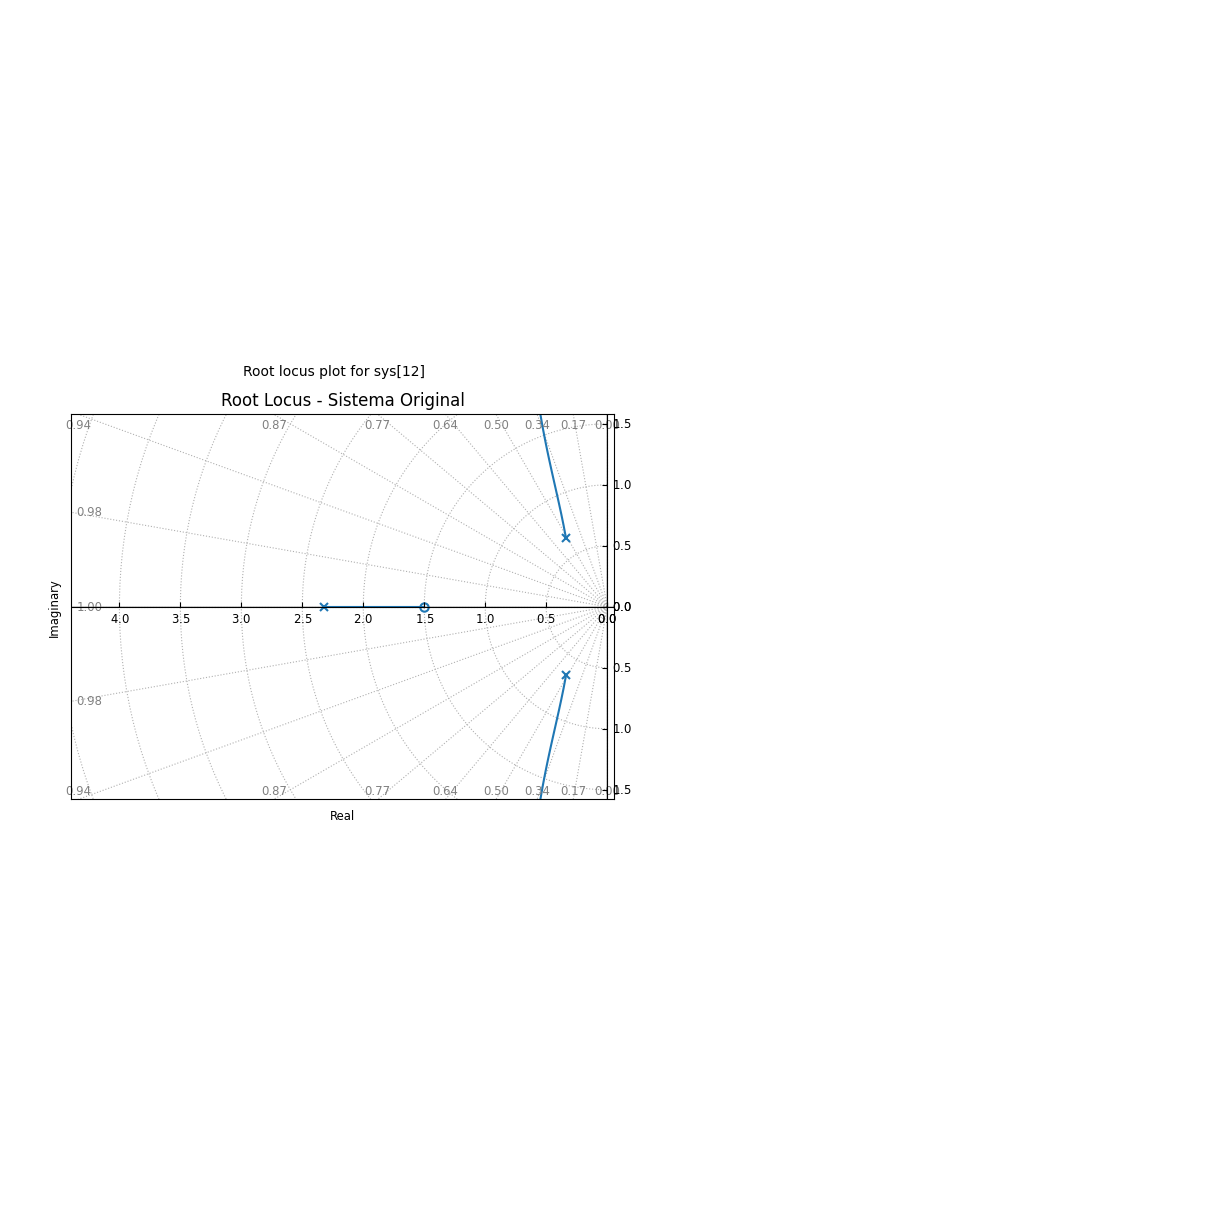

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


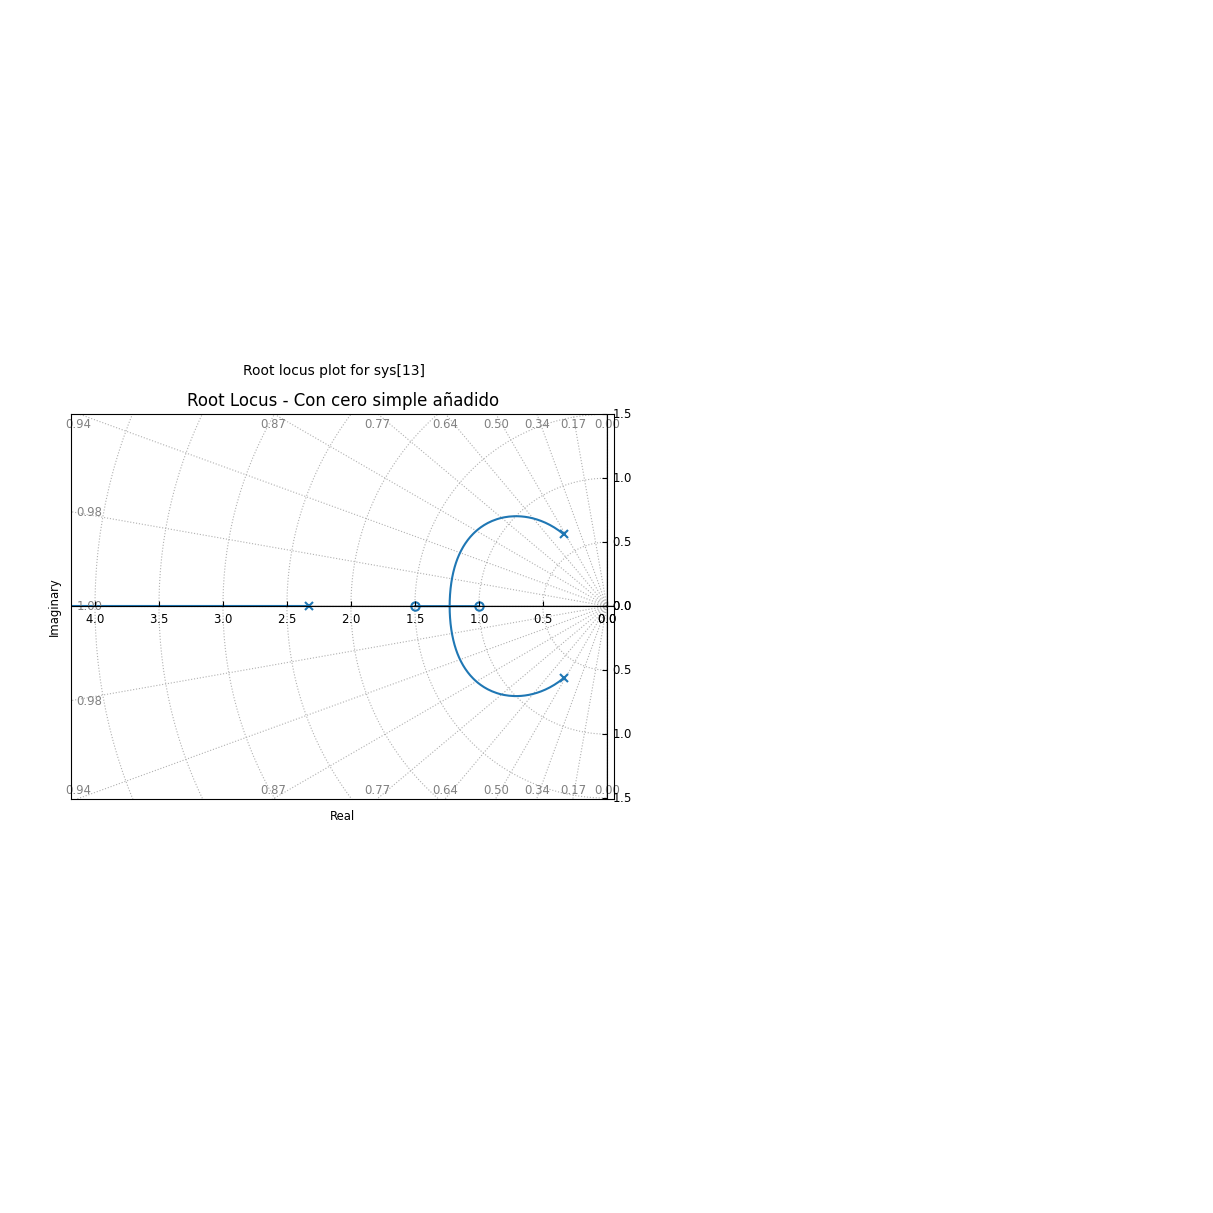

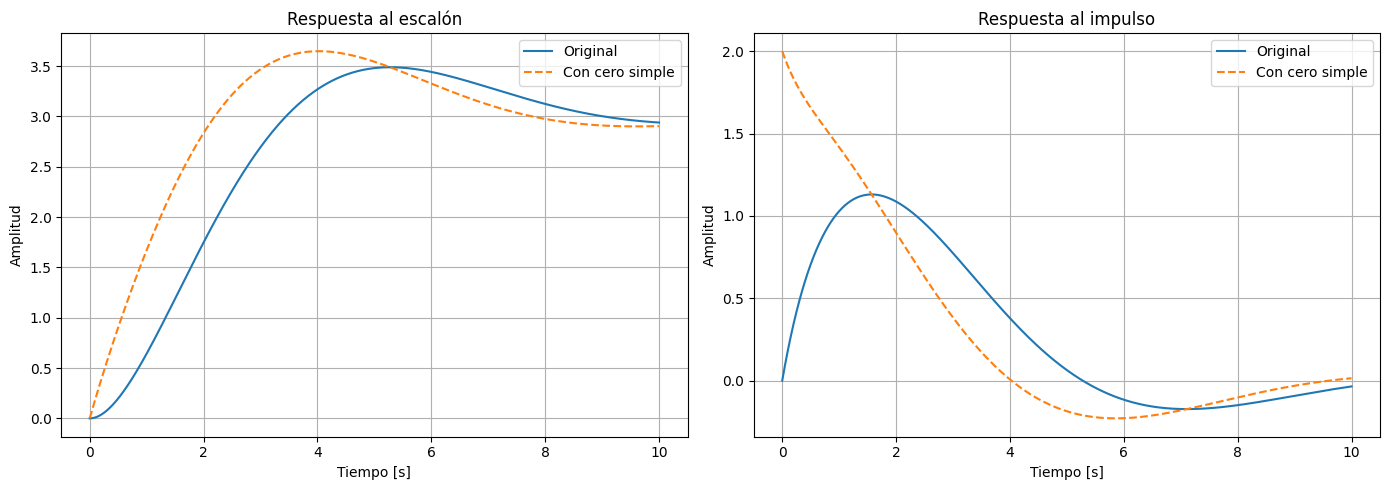

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definición de los sistemas
num_G = [2, 3]
den = [1, 3, 2, 1]
G = ctl.tf(num_G, den)

num_Gc = np.polymul(num_G, [1, 1])  # Añadir cero simple (s+1)
G_con_cero = ctl.tf(num_Gc, den)

# Crear figura para Root Locus del sistema original
fig1 = plt.figure(figsize=(7, 5))
ctl.root_locus(G)
plt.title("Root Locus - Sistema Original")
plt.grid(True)

# Crear figura para Root Locus del sistema con cero añadido
fig2 = plt.figure(figsize=(7, 5))
ctl.root_locus(G_con_cero)
plt.title("Root Locus - Con cero simple añadido")
plt.grid(True)

# Tiempo de simulación
t = np.linspace(0, 10, 1000)

# Respuestas al escalón e impulso en una sola figura
fig_resp, axs = plt.subplots(1, 2, figsize=(14, 5))

# Respuesta al escalón
t1, y1 = ctl.step_response(G, t)
t2, y2 = ctl.step_response(G_con_cero, t)
axs[0].plot(t1, y1, label='Original')
axs[0].plot(t2, y2, label='Con cero simple', linestyle='--')
axs[0].set_title("Respuesta al escalón")
axs[0].set_xlabel("Tiempo [s]")
axs[0].set_ylabel("Amplitud")
axs[0].legend()
axs[0].grid(True)

# Respuesta al impulso
t3, y3 = ctl.impulse_response(G, t)
t4, y4 = ctl.impulse_response(G_con_cero, t)
axs[1].plot(t3, y3, label='Original')
axs[1].plot(t4, y4, label='Con cero simple', linestyle='--')
axs[1].set_title("Respuesta al impulso")
axs[1].set_xlabel("Tiempo [s]")
axs[1].set_ylabel("Amplitud")
axs[1].legend()
axs[1].grid(True)

fig_resp.tight_layout()

# Mostrar todas las figuras al mismo tiempo
plt.show()


Análisis para Sobre-amortiguada (K=0.001):
Polos del sistema en lazo cerrado:
  (-2.324331228358399+0j)
  (-0.3378343858208006+0.5633736786573823j)
  (-0.3378343858208006-0.5633736786573823j)
Tiempo de establecimiento: 11.97 s
Sobreimpulso máximo: 16.36%
Tiempo de subida: 2.37 s

Análisis para Sub-amortiguada 1 (K=0.051):
Polos del sistema en lazo cerrado:
  (-2.3051050401151665+0j)
  (-0.3474474799424164+0.6160149140244164j)
  (-0.3474474799424164-0.6160149140244164j)
Tiempo de establecimiento: 11.38 s
Sobreimpulso máximo: 18.48%
Tiempo de subida: 2.16 s

Análisis para Sub-amortiguada 2 (K=5.0):
Polos del sistema en lazo cerrado:
  (-0.6810828736277527+3.0504301992474083j)
  (-0.6810828736277527-3.0504301992474083j)
  (-1.6378342527444965+0j)
Tiempo de establecimiento: 5.51 s
Sobreimpulso máximo: 55.47%
Tiempo de subida: 0.40 s


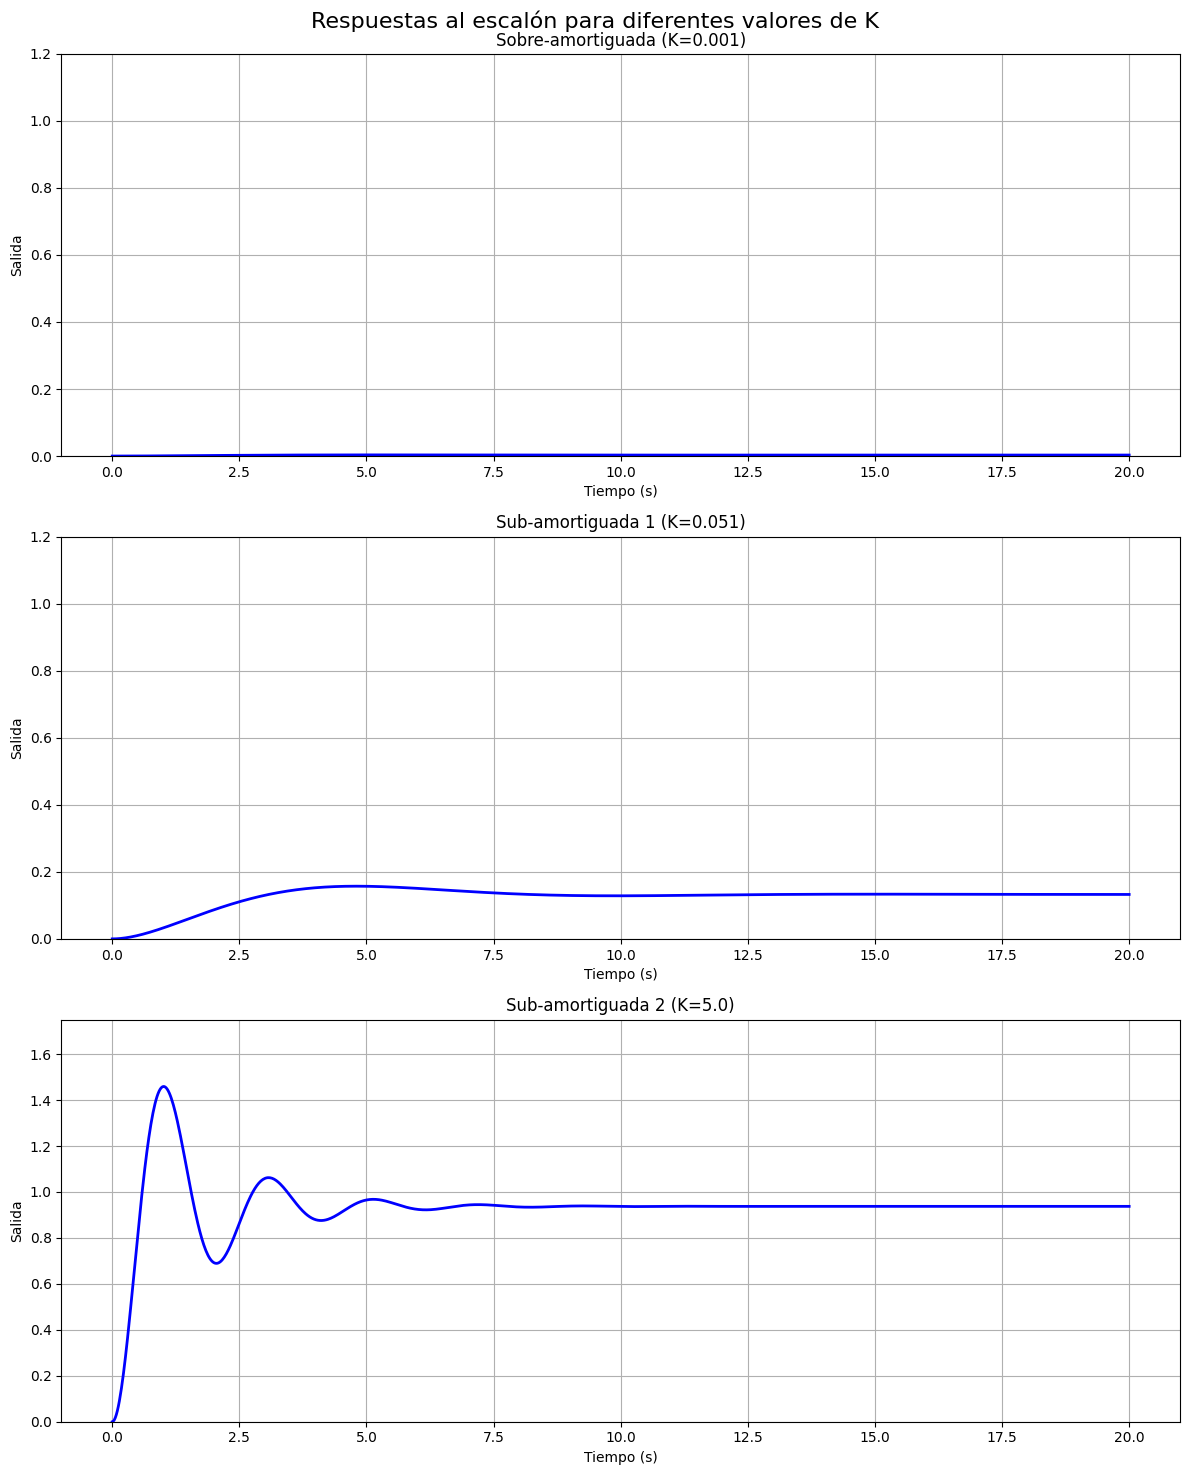

/home/jp/Repositorios/UDEA/Teoria_de_Control/.venv/lib/python3.12/site-packages/control/config.py:363: FutureWarning: keyword 'kvect' is deprecated; use 'gains'
  warnings.warn(
/home/jp/Repositorios/UDEA/Teoria_de_Control/.venv/lib/python3.12/site-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


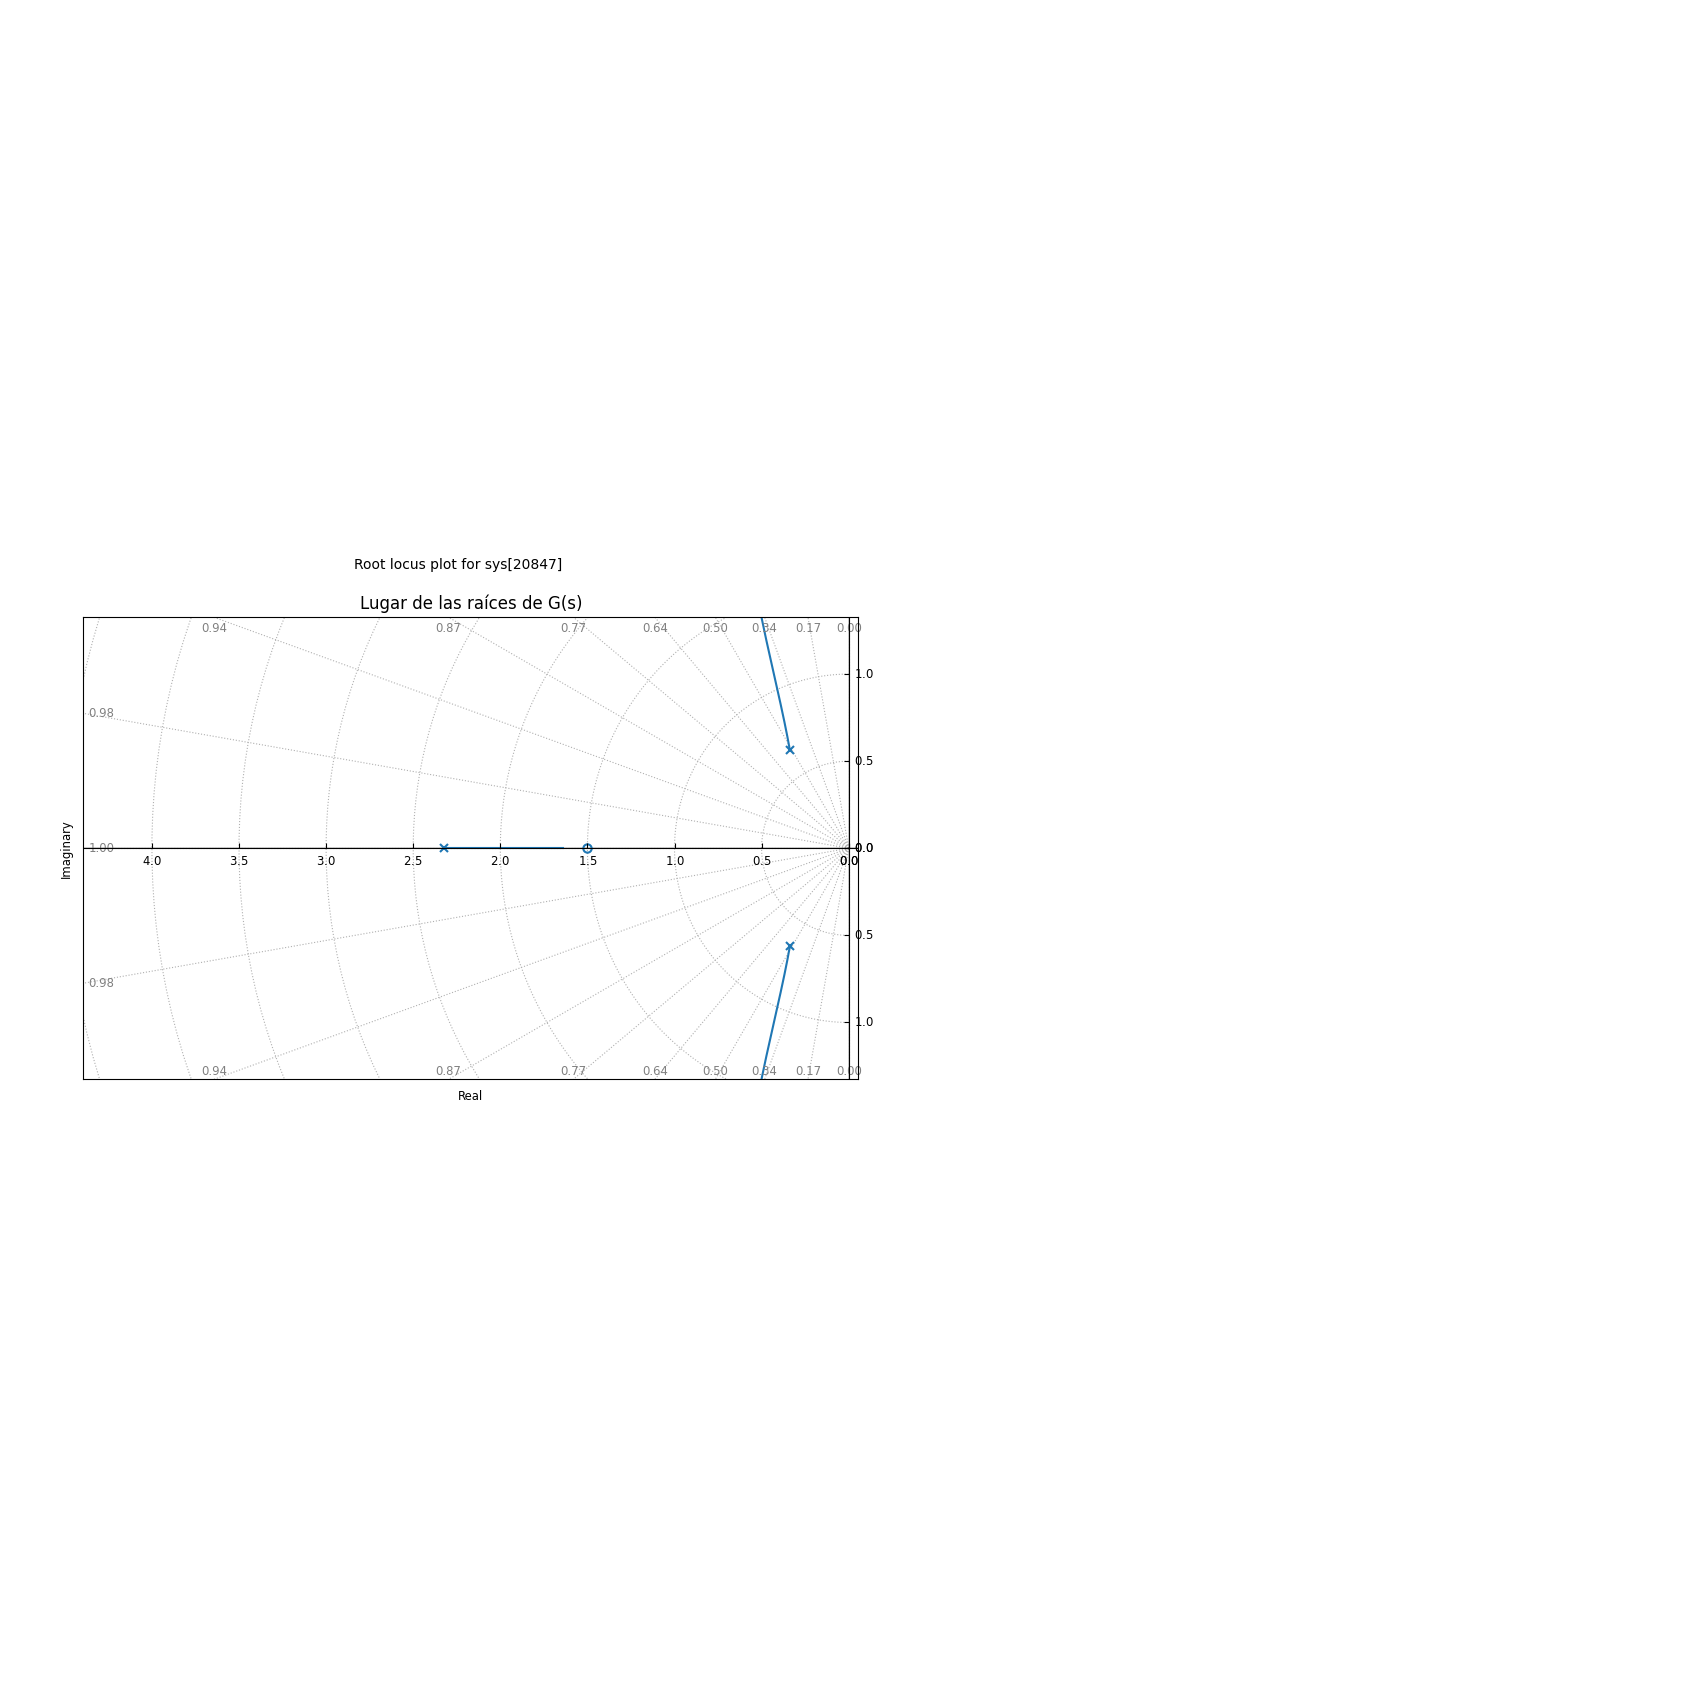

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Función de transferencia
num_G = [2, 3]
den_G = [1, 3, 2, 1]
G = ctrl.TransferFunction(num_G, den_G)

# Valores de K seleccionados
K_values = {
    "Sobre-amortiguada": 0.001,    # K = 0 (sistema original)
    "Sub-amortiguada 1": 0.051,    # Primer caso de sub-amortiguado
    "Sub-amortiguada 2": 5.000     # Caso con mayor oscilación
}

# Crear figura con subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Respuestas al escalón para diferentes valores de K', fontsize=16)

# Análisis detallado para cada K
for idx, (etiqueta, K) in enumerate(K_values.items()):
    Gc = ctrl.feedback(K * G, 1)
    t, y = ctrl.step_response(Gc, T=np.linspace(0, 20, 1000))
    
    # Graficar en subplot correspondiente
    axs[idx].plot(t, y, 'b-', linewidth=2)
    axs[idx].set_title(f'{etiqueta} (K={K})')
    axs[idx].set_xlabel('Tiempo (s)')
    axs[idx].set_ylabel('Salida')
    axs[idx].grid(True)
    
    # Ajustar límites del eje y para mejor visualización
    axs[idx].set_ylim([0, max(1.2, max(y)*1.2)])
    
    # Imprimir información
    print(f"\nAnálisis para {etiqueta} (K={K}):")
    print("Polos del sistema en lazo cerrado:")
    for p in Gc.poles():
        print(f"  {p}")
    
    # Calcular características de la respuesta
    info = ctrl.step_info(Gc)
    print(f"Tiempo de establecimiento: {info['SettlingTime']:.2f} s")
    print(f"Sobreimpulso máximo: {info['Overshoot']:.2f}%")
    print(f"Tiempo de subida: {info['RiseTime']:.2f} s")

plt.tight_layout()
plt.show()

# Lugar de las raíces
plt.figure(figsize=(10, 6))
rlocus_G = ctrl.rlocus(G, kvect=np.linspace(0, 5, 1000), plot=True)
plt.title("Lugar de las raíces de G(s)")
plt.grid(True)
plt.show()

Polos en lazo abierto:
H(s): [-0.71805717+0.j         -0.14097142+0.66659032j -0.14097142-0.66659032j]
G(s): [-2.32471796+0.j         -0.33764102+0.56227951j -0.33764102-0.56227951j]


Análisis para H(s):
K sobre-amortiguado: No encontrado
K críticamente amortiguado: No encontrado
K sub-amortiguado: 0.001000

Ejemplos de análisis para H(s):
K =  0.001: Sub-amortiguado
K =  0.010: Sub-amortiguado
K =  0.100: Sub-amortiguado
K =  1.000: Inestable
K = 10.000: Inestable

Análisis para G(s):
K sobre-amortiguado: No encontrado
K críticamente amortiguado: No encontrado
K sub-amortiguado: 0.001000

Ejemplos de análisis para G(s):
K =  0.001: Sub-amortiguado
K =  0.010: Sub-amortiguado
K =  0.100: Sub-amortiguado
K =  1.000: Sub-amortiguado
K = 10.000: Sub-amortiguado

Sub-amortiguado (K=0.001000) - Polos: [-0.72229448+0.j         -0.13901937+0.66830046j -0.13901937-0.66830046j]


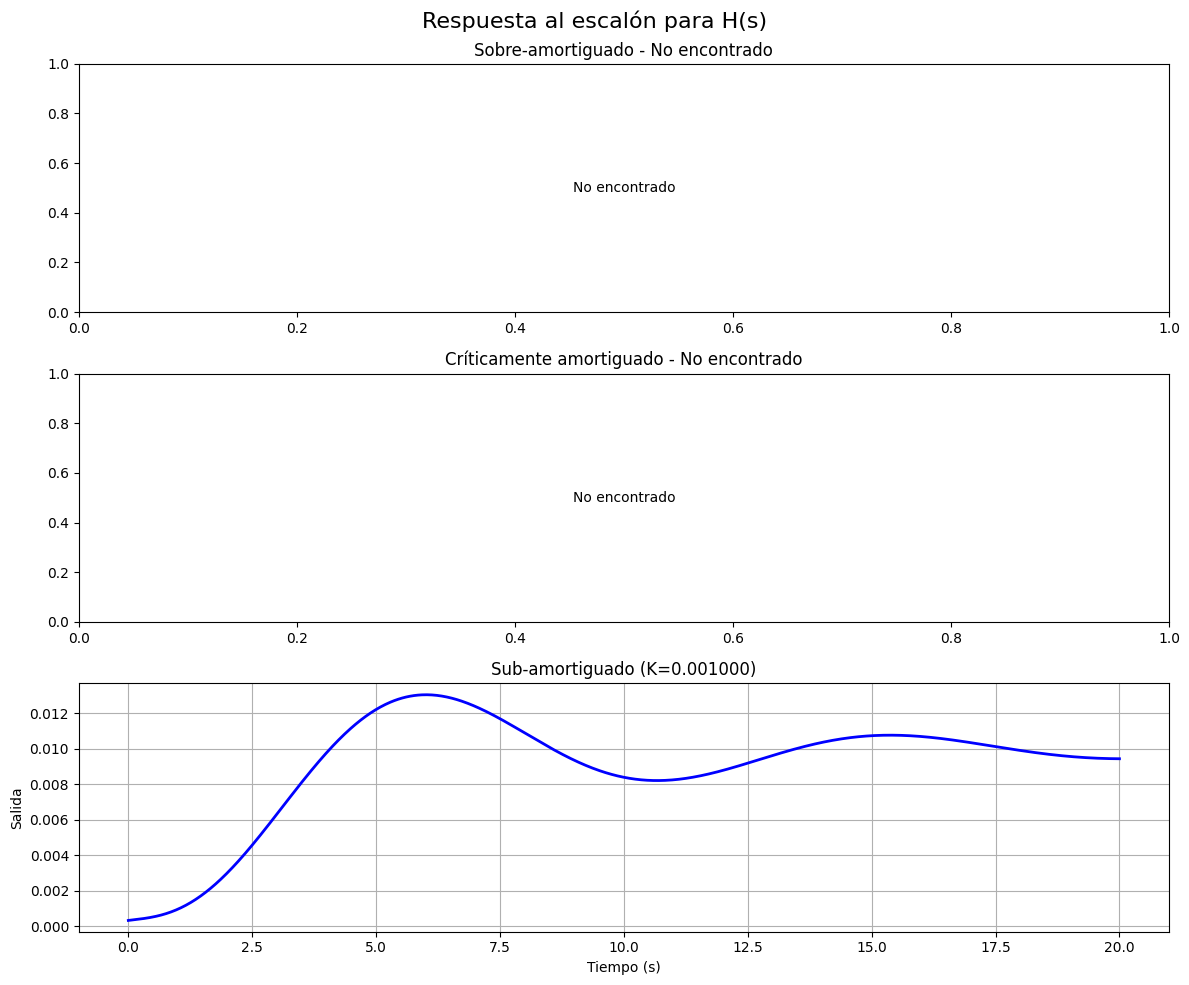


Sub-amortiguado (K=0.001000) - Polos: [-2.32433123+0.j         -0.33783439+0.56337368j -0.33783439-0.56337368j]


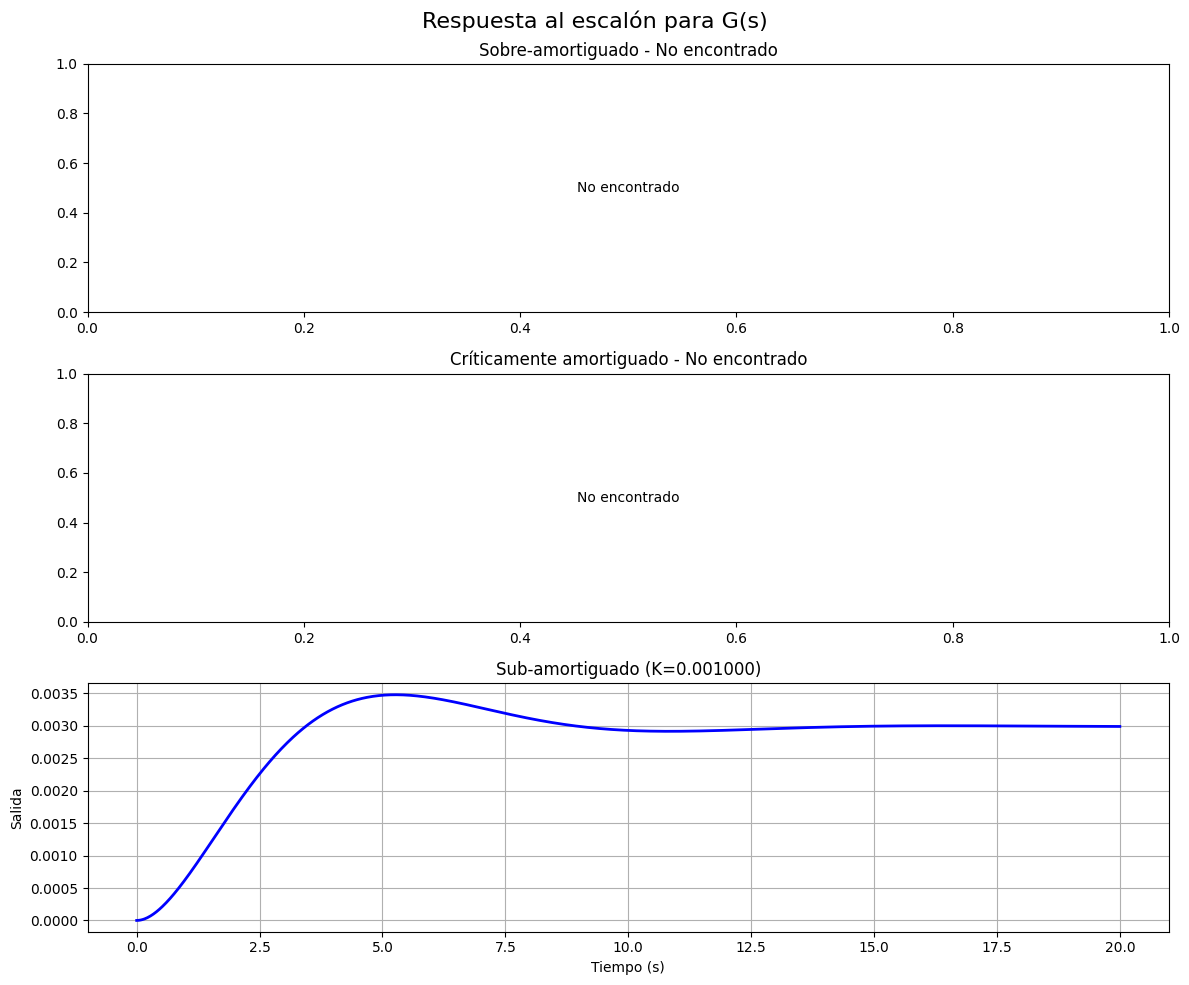

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir funciones de transferencia
num_H = [1, 2, 1, 10]
den_H = [3, 3, 2, 1]
H = ctrl.tf(num_H, den_H)

num_G = [2, 3]
den_G = [1, 3, 2, 1]
G = ctrl.tf(num_G, den_G)

# Primero analicemos los polos en lazo abierto
print("Polos en lazo abierto:")
print(f"H(s): {H.poles()}")
print(f"G(s): {G.poles()}")

def analizar_amortiguamiento(K, sistema, nombre):
    """Analiza el tipo de amortiguamiento para un K dado"""
    try:
        Gc = ctrl.feedback(K * sistema, 1)
        polos = Gc.poles()
        
        # Filtrar polos estables (parte real negativa)
        polos_estables = [p for p in polos if p.real < 0]
        
        if len(polos_estables) != len(polos):
            return "Inestable"
        
        # Verificar si hay polos complejos
        complex_poles = [p for p in polos_estables if abs(p.imag) > 1e-6]
        
        if len(complex_poles) > 0:
            return "Sub-amortiguado"
        else:
            # Todos son reales, verificar si hay repetidos
            for i in range(len(polos_estables)):
                for j in range(i+1, len(polos_estables)):
                    if abs(polos_estables[i] - polos_estables[j]) < 1e-2:
                        return "Críticamente amortiguado"
            return "Sobre-amortiguado"
    except:
        return "Error"

def encontrar_Ks_mejorado(sistema, nombre):
    """Busca valores de K para diferentes tipos de amortiguamiento"""
    K_sobre = None
    K_critico = None  
    K_sub = None
    
    # Buscar en un rango más amplio y con más puntos
    K_range = np.logspace(-3, 1, 2000)  # De 0.001 a 10 en escala logarítmica
    
    for K in K_range:
        tipo = analizar_amortiguamiento(K, sistema, nombre)
        
        if tipo == "Sobre-amortiguado" and K_sobre is None:
            K_sobre = K
        elif tipo == "Críticamente amortiguado" and K_critico is None:
            K_critico = K
        elif tipo == "Sub-amortiguado" and K_sub is None:
            K_sub = K
        
        # Si ya encontró los tres, salir
        if K_sobre and K_critico and K_sub:
            break
    
    return K_sobre, K_critico, K_sub

# Buscar valores para ambos sistemas
print("\n" + "="*50)
for nombre, sistema in [("H(s)", H), ("G(s)", G)]:
    print(f"\nAnálisis para {nombre}:")
    K_sobre, K_critico, K_sub = encontrar_Ks_mejorado(sistema, nombre)
    
    print(f"K sobre-amortiguado: {K_sobre:.6f}" if K_sobre else "K sobre-amortiguado: No encontrado")
    print(f"K críticamente amortiguado: {K_critico:.6f}" if K_critico else "K críticamente amortiguado: No encontrado")
    print(f"K sub-amortiguado: {K_sub:.6f}" if K_sub else "K sub-amortiguado: No encontrado")
    
    # Mostrar algunos ejemplos de análisis
    print(f"\nEjemplos de análisis para {nombre}:")
    for K_test in [0.001, 0.01, 0.1, 1.0, 10.0]:
        tipo = analizar_amortiguamiento(K_test, sistema, nombre)
        print(f"K = {K_test:6.3f}: {tipo}")

# Graficar respuestas con valores encontrados
def graficar_con_valores_encontrados(sistema, nombre, K_sobre, K_critico, K_sub):
    fig, axs = plt.subplots(3, 1, figsize=(12, 10))
    fig.suptitle(f'Respuesta al escalón para {nombre}', fontsize=16)
    t = np.linspace(0, 20, 1000)
    
    casos = [
        ("Sobre-amortiguado", K_sobre),
        ("Críticamente amortiguado", K_critico), 
        ("Sub-amortiguado", K_sub)
    ]
    
    for idx, (tipo, K) in enumerate(casos):
        if K is not None:
            try:
                Gc = ctrl.feedback(K * sistema, 1)
                t_resp, y = ctrl.step_response(Gc, T=t)
                axs[idx].plot(t_resp, y, 'b-', linewidth=2)
                axs[idx].set_title(f'{tipo} (K={K:.6f})')
                axs[idx].set_xlabel('Tiempo (s)')
                axs[idx].set_ylabel('Salida')
                axs[idx].grid(True)
                
                # Mostrar polos
                polos = Gc.poles()
                print(f"\n{tipo} (K={K:.6f}) - Polos: {polos}")
                
            except Exception as e:
                axs[idx].set_title(f'{tipo} - Error')
                axs[idx].text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', transform=axs[idx].transAxes)
        else:
            axs[idx].set_title(f'{tipo} - No encontrado')
            axs[idx].text(0.5, 0.5, 'No encontrado', ha='center', va='center', transform=axs[idx].transAxes)
    
    plt.tight_layout()
    plt.show()

# Graficar para ambos sistemas
for nombre, sistema in [("H(s)", H), ("G(s)", G)]:
    K_sobre, K_critico, K_sub = encontrar_Ks_mejorado(sistema, nombre)
    graficar_con_valores_encontrados(sistema, nombre, K_sobre, K_critico, K_sub)